In [1]:
import pandas as pd


In [3]:
file_path = 'tourism_dataset.csv'  
df = pd.read_csv(file_path)

df.head()


,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


In [5]:
print("Missing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64


In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df_cleaned = df.drop_duplicates()


Number of duplicate rows: 0


In [9]:
# Total visitors per country
total_visitors_country = df_cleaned.groupby('Country')['Visitors'].sum()
print("Total Visitors per Country:")
print(total_visitors_country)



Total Visitors per Country:
Country
Australia    416038005
Brazil       414293518
China        404448372
Egypt        458573652
France       424944621
India        451083005
USA          431204187
Name: Visitors, dtype: int64


In [11]:
# Average visitors per country
average_visitors_country = df_cleaned.groupby('Country')['Visitors'].mean()
print("\nAverage Visitors per Country:")
print(average_visitors_country)





Average Visitors per Country:
Country
Australia    501250.608434
Brazil       493206.569048
China        501796.987593
Egypt        502821.986842
France       495851.366394
India        503440.853795
USA          508495.503538
Name: Visitors, dtype: float64


In [13]:
# Total visitors per category
total_visitors_category = df_cleaned.groupby('Category')['Visitors'].sum()
print("\nTotal Visitors per Category:")
print(total_visitors_category)




Total Visitors per Category:
Category
Adventure     528962493
Beach         495111800
Cultural      495834336
Historical    495958186
Nature        469346177
Urban         515372368
Name: Visitors, dtype: int64


In [15]:
# Average visitors per category
average_visitors_category = df_cleaned.groupby('Category')['Visitors'].mean()
print("\nAverage Visitors per Category:")
print(average_visitors_category)


Average Visitors per Category:
Category
Adventure     510089.192864
Beach         496104.008016
Cultural      496827.991984
Historical    498951.897384
Nature        490947.883891
Urban         512298.576541
Name: Visitors, dtype: float64


In [17]:
# Average rating per country
avg_rating_country = df_cleaned.groupby('Country')['Rating'].mean()
print("\nAverage Rating per Country:")
print(avg_rating_country)


Average Rating per Country:
Country
Australia    3.019602
Brazil       3.074167
China        2.958648
Egypt        3.024298
France       3.030268
India        2.973158
USA          2.984304
Name: Rating, dtype: float64


In [19]:
# Max and Min ratings per country
max_rating_country = df_cleaned.groupby('Country')['Rating'].max()
min_rating_country = df_cleaned.groupby('Country')['Rating'].min()
print("\nMax Rating per Country:")
print(max_rating_country)
print("\nMin Rating per Country:")
print(min_rating_country)



Max Rating per Country:
Country
Australia    5.00
Brazil       4.98
China        5.00
Egypt        5.00
France       5.00
India        4.99
USA          5.00
Name: Rating, dtype: float64

Min Rating per Country:
Country
Australia    1.00
Brazil       1.01
China        1.00
Egypt        1.00
France       1.00
India        1.00
USA          1.00
Name: Rating, dtype: float64


In [21]:
# Average rating per category
avg_rating_category = df_cleaned.groupby('Category')['Rating'].mean()
print("\nAverage Rating per Category:")
print(avg_rating_category)


Average Rating per Category:
Category
Adventure     3.008804
Beach         3.072285
Cultural      2.997074
Historical    3.003139
Nature        2.978117
Urban         2.995457
Name: Rating, dtype: float64


In [23]:
# Max and Min ratings per category
max_rating_category = df_cleaned.groupby('Category')['Rating'].max()
min_rating_category = df_cleaned.groupby('Category')['Rating'].min()
print("\nMax Rating per Category:")
print(max_rating_category)
print("\nMin Rating per Category:")
print(min_rating_category)


Max Rating per Category:
Category
Adventure     5.0
Beach         5.0
Cultural      5.0
Historical    5.0
Nature        5.0
Urban         5.0
Name: Rating, dtype: float64

Min Rating per Category:
Category
Adventure     1.0
Beach         1.0
Cultural      1.0
Historical    1.0
Nature        1.0
Urban         1.0
Name: Rating, dtype: float64


In [25]:
# Total revenue
total_revenue = df_cleaned['Revenue'].sum()
print("\nTotal Revenue:")
print(total_revenue)

# Revenue per visitor for each location
df_cleaned['Revenue_per_Visitor'] = df_cleaned['Revenue'] / df_cleaned['Visitors']
print("\nRevenue per Visitor for Each Location:")
print(df_cleaned[['Location', 'Revenue_per_Visitor']])



Total Revenue:
2991381930.4800005

Revenue per Visitor for Each Location:
        Location  Revenue_per_Visitor
0     kuBZRkVsAR             0.088937
1     aHKUXhjzTo             0.986479
2     dlrdYtJFTA             0.666002
3     DxmlzdGkHK             0.473560
4     WJCCQlepnz             4.387815
...          ...                  ...
5984  xAzwnVKAqz             0.160419
5985  IfKotyaJFC             1.176851
5986  bPyubCWGgA             1.145995
5987  kkWIucpBnu             0.143253
5988  gHXUrdticm            23.376899

[5989 rows x 2 columns]


In [27]:
# Group by 'Accommodation_Available' and calculate average statistics
accommodation_impact = df_cleaned.groupby('Accommodation_Available').agg({
    'Visitors': 'mean',
    'Rating': 'mean',
    'Revenue': 'mean'
})

print("\nImpact of Accommodation Availability on Visitors, Rating, and Revenue:")
print(accommodation_impact)



Impact of Accommodation Availability on Visitors, Rating, and Revenue:
                              Visitors    Rating        Revenue
Accommodation_Available                                        
No                       509039.244288  2.993155  500830.503891
Yes                      493091.460007  3.025340  498144.822735


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

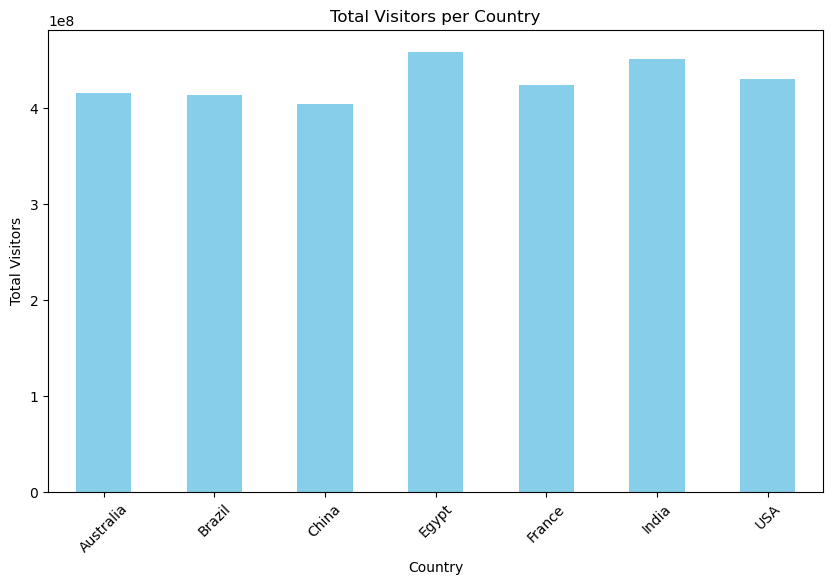

In [31]:
# Bar chart for total visitors per country
plt.figure(figsize=(10,6))
total_visitors_country.plot(kind='bar', color='skyblue')
plt.title('Total Visitors per Country')
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
plt.show()

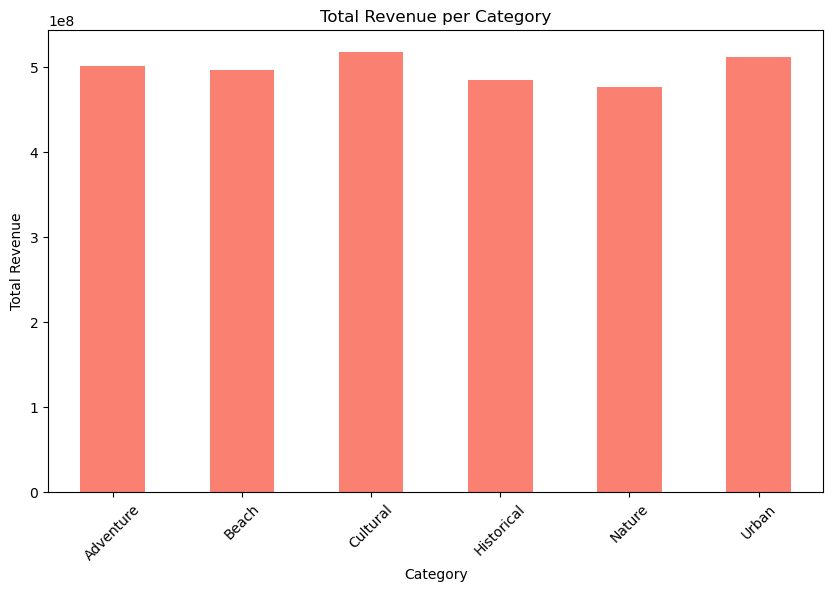

In [33]:
# Bar chart for total revenue per category
plt.figure(figsize=(10,6))
total_revenue_category = df_cleaned.groupby('Category')['Revenue'].sum()
total_revenue_category.plot(kind='bar', color='salmon')
plt.title('Total Revenue per Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

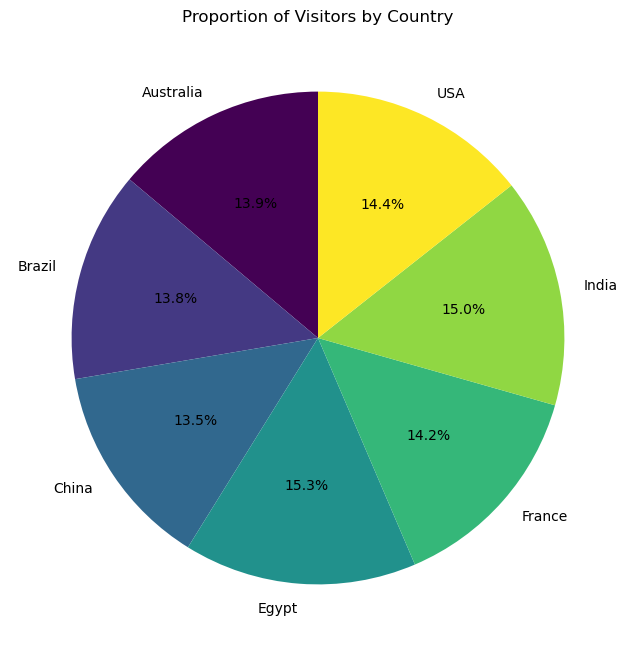

In [41]:
# Pie chart for proportion of visitors by country
plt.figure(figsize=(8,8))
df_cleaned.groupby('Country')['Visitors'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Proportion of Visitors by Country')
plt.ylabel('')  # Hide the y-label for better appearance
plt.show()

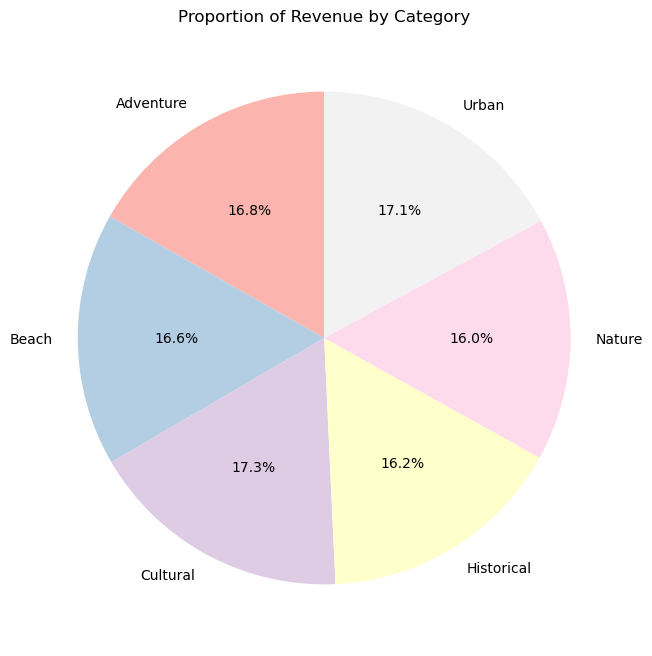

In [43]:
# Pie chart for proportion of revenue by category
plt.figure(figsize=(8,8))
df_cleaned.groupby('Category')['Revenue'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1')
plt.title('Proportion of Revenue by Category')
plt.ylabel('')
plt.show()

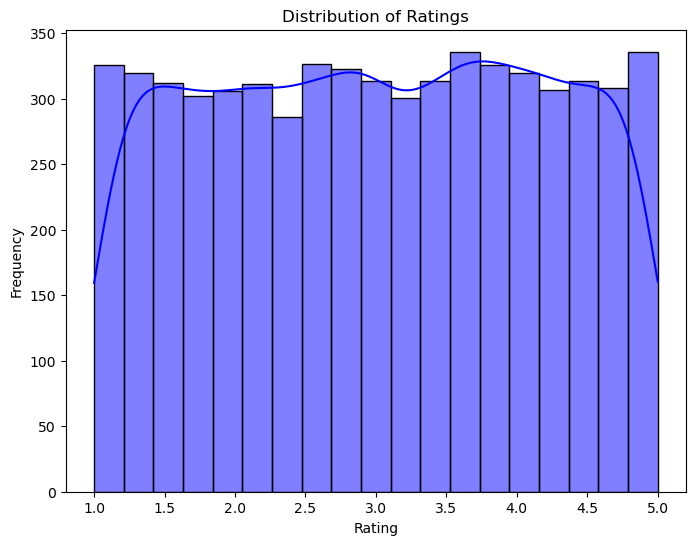

In [45]:
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['Rating'], kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


C:\Users\Arun\AppData\Local\Temp\ipykernel_16036\3068578383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Revenue', data=df_cleaned, palette='Set3')


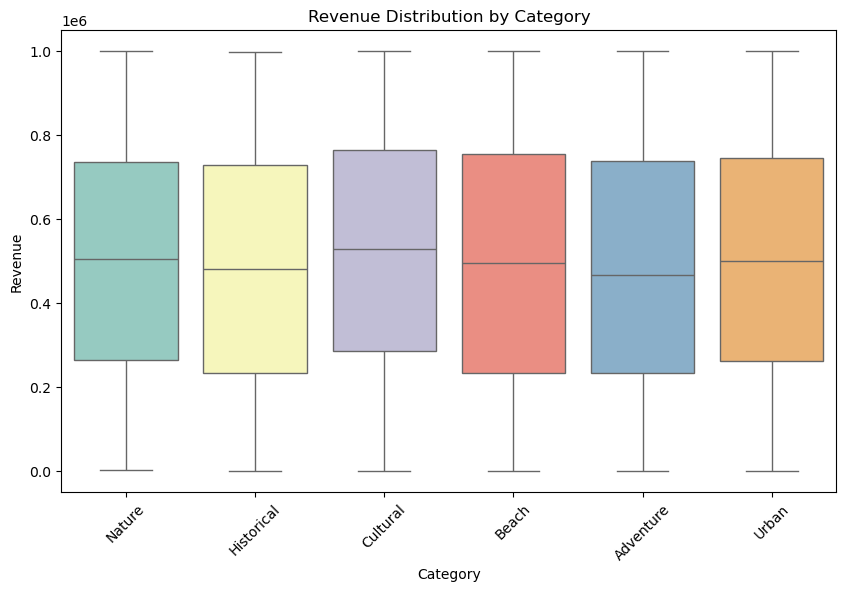

In [49]:
# Box plot: Revenue distribution by category
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Revenue', data=df_cleaned, palette='Set3')
plt.title('Revenue Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arun\AppData\Local\Temp\ipykernel_16036\4017915655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=df_cleaned, palette='Set2')


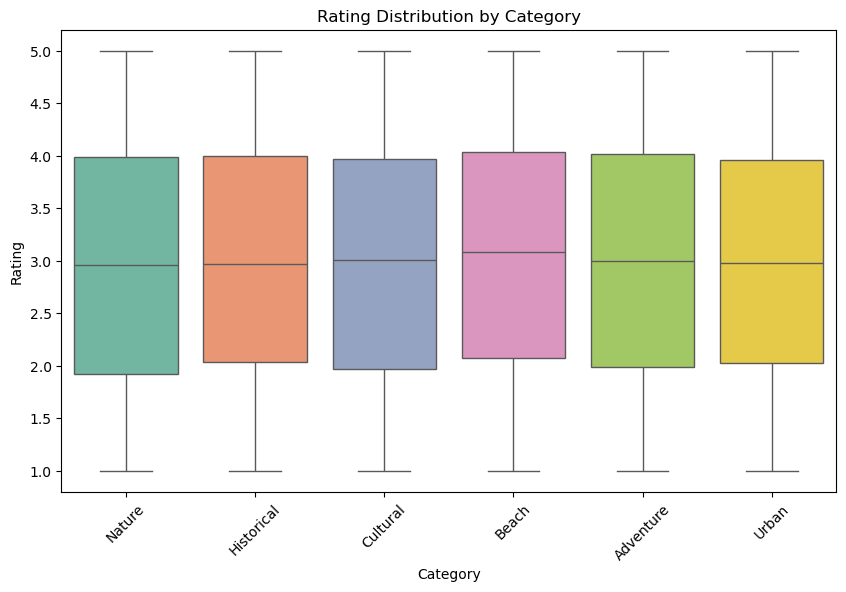

In [51]:
# Box plot: Rating distribution by category
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Rating', data=df_cleaned, palette='Set2')
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arun\AppData\Local\Temp\ipykernel_16036\1012804678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df_cleaned, palette='Set1')


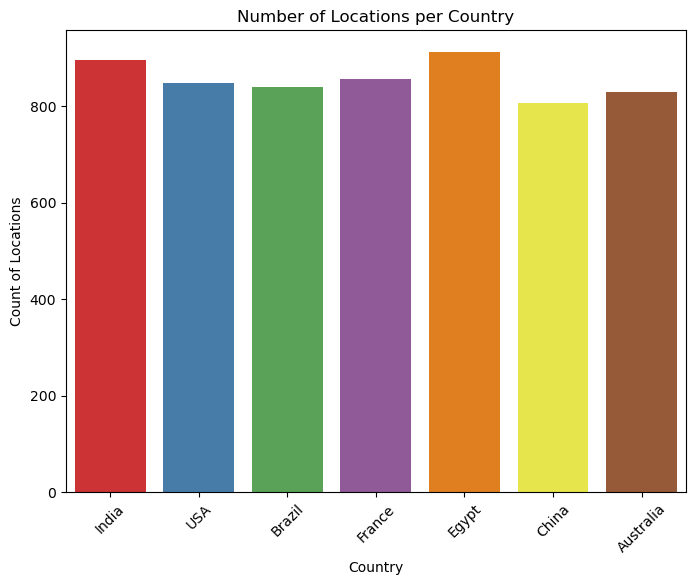

In [53]:
# Count plot: Number of locations per country
plt.figure(figsize=(8,6))
sns.countplot(x='Country', data=df_cleaned, palette='Set1')
plt.title('Number of Locations per Country')
plt.xlabel('Country')
plt.ylabel('Count of Locations')
plt.xticks(rotation=45)
plt.show()

C:\Users\Arun\AppData\Local\Temp\ipykernel_16036\981693683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df_cleaned, palette='Set2')


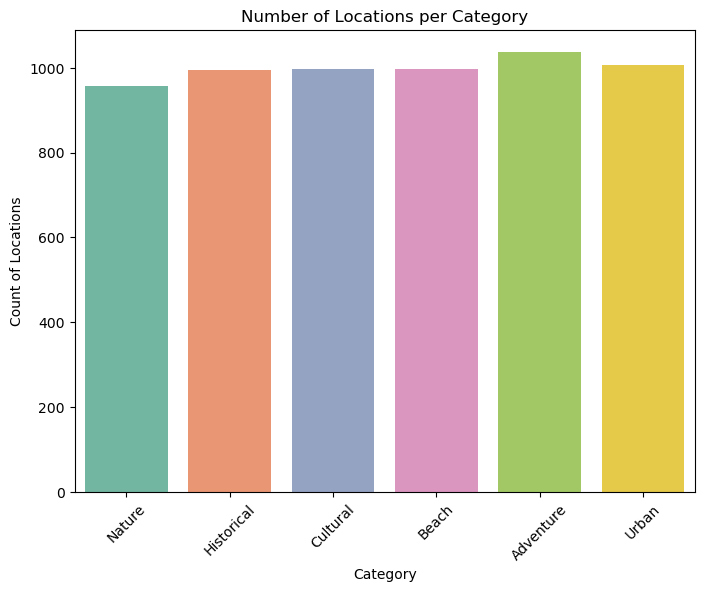

In [55]:
# Count plot: Number of locations per category
plt.figure(figsize=(8,6))
sns.countplot(x='Category', data=df_cleaned, palette='Set2')
plt.title('Number of Locations per Category')
plt.xlabel('Category')
plt.ylabel('Count of Locations')
plt.xticks(rotation=45)
plt.show()

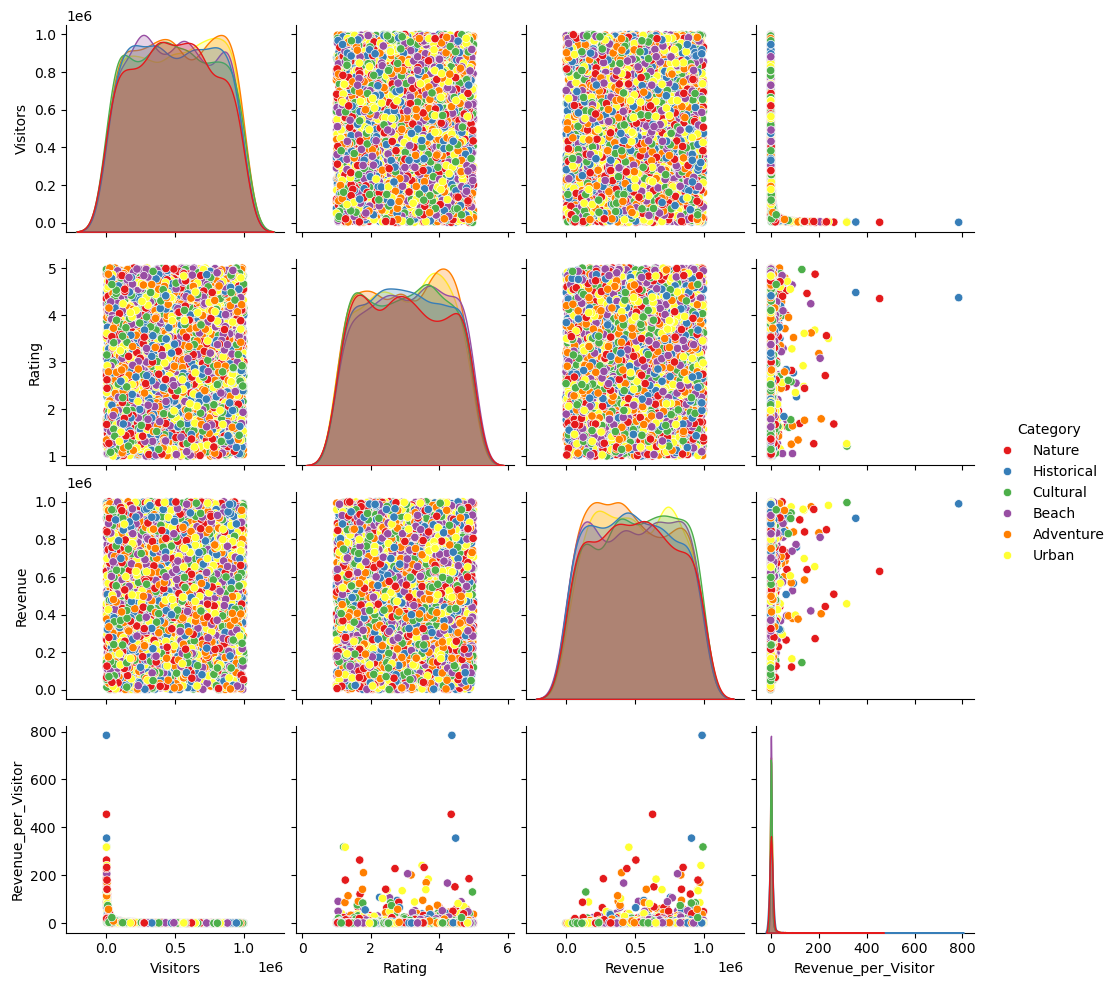

In [57]:
# Pair plot to show pairwise relationships
sns.pairplot(df_cleaned, hue='Category', palette='Set1', diag_kind='kde')
plt.show()

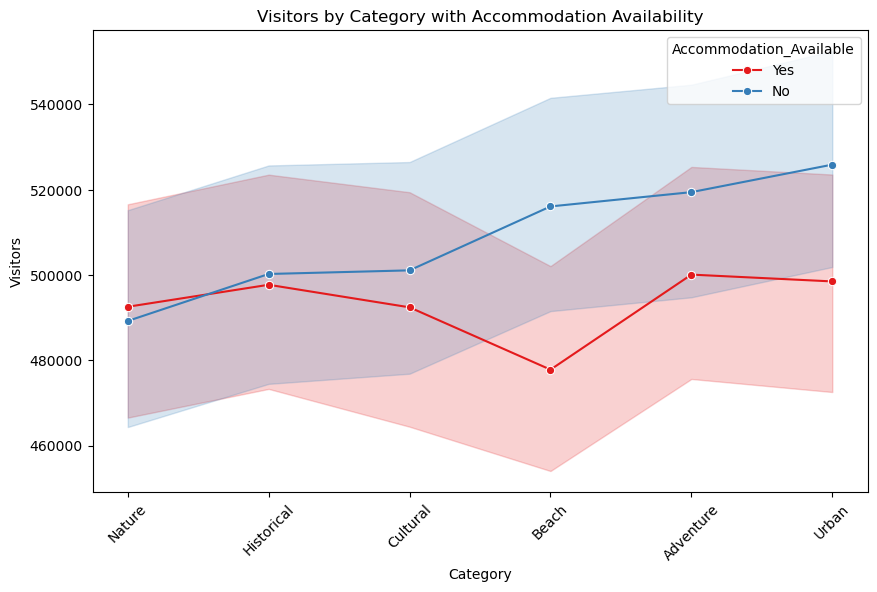

In [59]:
# Line plot: Visitors by category
plt.figure(figsize=(10,6))
sns.lineplot(x='Category', y='Visitors', data=df_cleaned, marker='o', hue='Accommodation_Available', palette='Set1')
plt.title('Visitors by Category with Accommodation Availability')
plt.xlabel('Category')
plt.ylabel('Visitors')
plt.xticks(rotation=45)
plt.show()

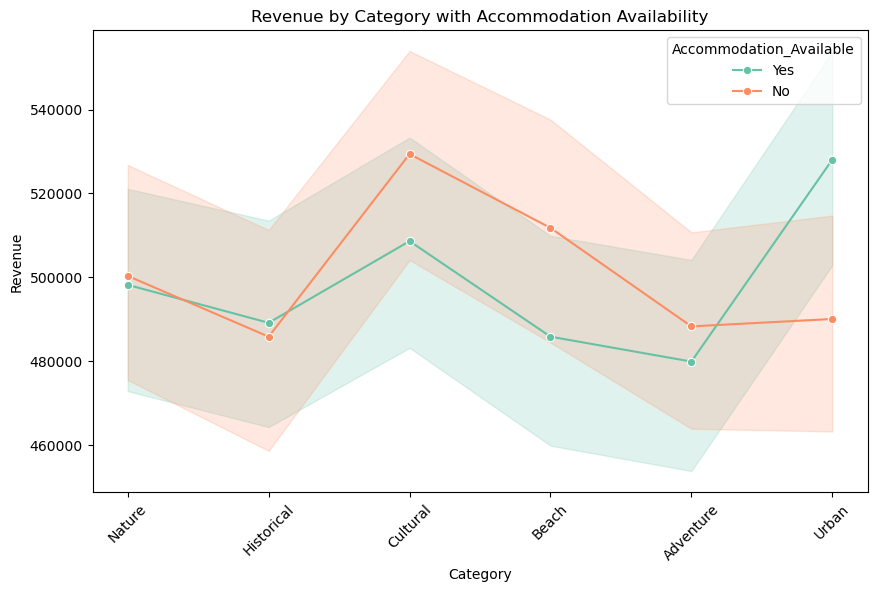

In [61]:
# Line plot: Revenue by category
plt.figure(figsize=(10,6))
sns.lineplot(x='Category', y='Revenue', data=df_cleaned, marker='o', hue='Accommodation_Available', palette='Set2')
plt.title('Revenue by Category with Accommodation Availability')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

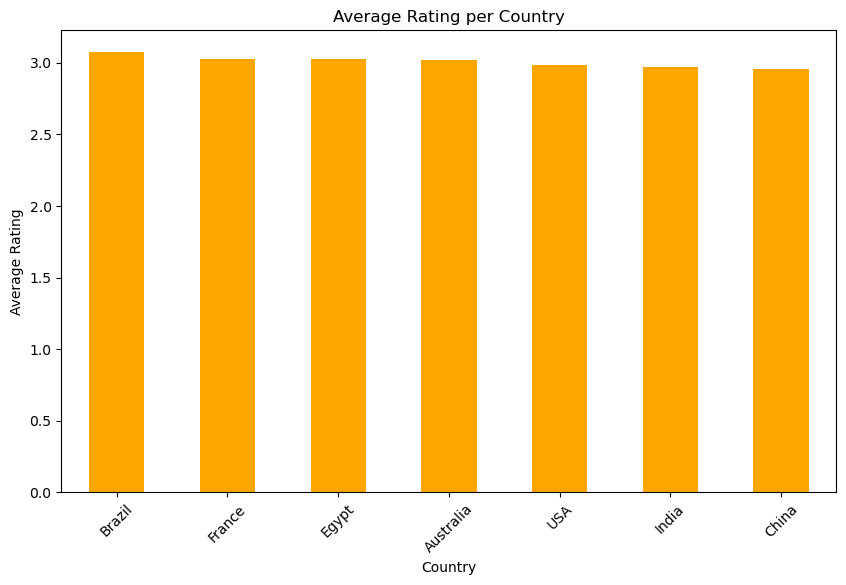

In [65]:
# Bar plot: Average rating per country
plt.figure(figsize=(10,6))
avg_rating_country = df_cleaned.groupby('Country')['Rating'].mean().sort_values(ascending=False)
avg_rating_country.plot(kind='bar', color='orange')
plt.title('Average Rating per Country')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

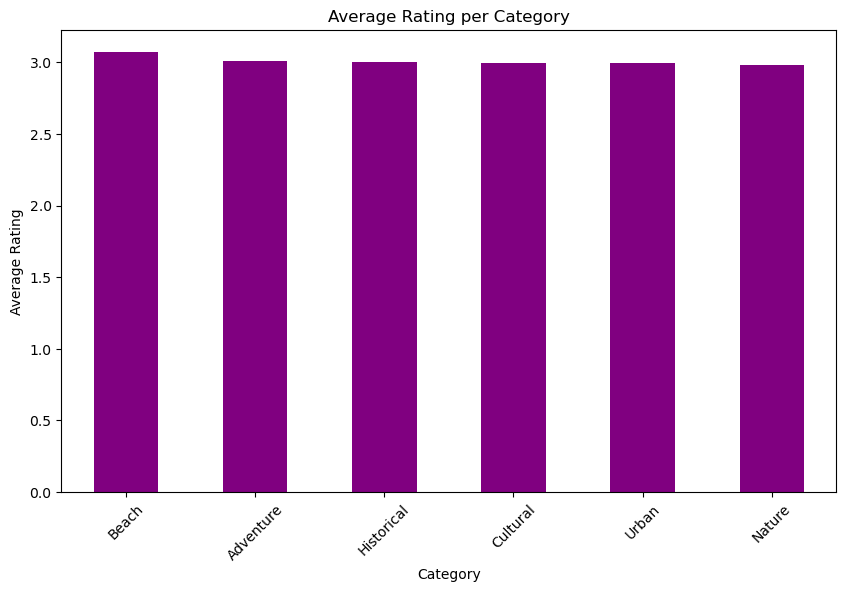

In [67]:
# Bar plot: Average rating per category
plt.figure(figsize=(10,6))
avg_rating_category = df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=False)
avg_rating_category.plot(kind='bar', color='purple')
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()